In [295]:
import numpy as np
import scipy as sc
from scipy import stats
import pandas as pd


import matplotlib.pyplot as plt

# 2b. Use simulation with over 1000 replications to estimate the probability that the system will be functional for more than 60 minutes and give a 95% confidence interval.

In [296]:
n = 1000
mean = np.array([60, 50, 75, 75, 60, 70])
stdDev = np.array([15, 10, 15, 20, 15, 15])


In [297]:
def functionalAfter60(mean, stdDev):
    counter = 0
    storage = [];
    for i in range(n):
        norm = []
        for j in range(6):
            norm.append((np.random.normal(mean[j], stdDev[j])))
        total = min(max(min(norm[0], norm[1]), norm[2]), norm[3], max(norm[4], norm[5]))
        if total >= 60:
            counter+=1
        storage.append(total)
    print(counter)


In [298]:
functionalAfter60(mean, stdDev)

561


In 1000 simulations, roughly 575 of them reached a lifetime of 60 minutes, making the probability 57.5%

In [299]:
def confidence(data):
    print(sc.stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=sc.stats.sem(data)))

In [300]:
confidence(storage)

(61.60422045134278, 63.02931335875836)


In [301]:
import statistics 
print(statistics.variance(storage))
print(statistics.mean(storage))


131.84911108025275
62.31676690505057


# 2d Expected Lifetime

In [302]:
def avglife(mean, stdDev):
    counter = 0
    storage = [];
    for i in range(n):
        norm = []
        for j in range(6):
            norm.append((np.random.normal(mean[j], stdDev[j])))
        total = min(max(min(norm[0], norm[1]), norm[2]), norm[3], max(norm[4], norm[5]))
        storage.append(total)
    print(sum(storage)/n)

In [303]:
avglife(mean, stdDev)

61.473771961730804


In [304]:
confidence(storage)

(61.60422045134278, 63.02931335875836)


# 3

(array([219., 179., 212., 198., 197., 179., 195., 194., 211., 209., 204.,
        223., 209., 192., 180., 184., 211., 203., 218., 183., 197., 214.,
        199., 241., 219., 202., 217., 191., 200., 178., 225., 203., 206.,
        199., 175., 212., 203., 212., 200., 209., 196., 182., 198., 168.,
        206., 198., 176., 189., 194., 191.]),
 array([-9.99983277e-01, -9.59987311e-01, -9.19991344e-01, -8.79995378e-01,
        -8.39999412e-01, -8.00003445e-01, -7.60007479e-01, -7.20011512e-01,
        -6.80015546e-01, -6.40019580e-01, -6.00023613e-01, -5.60027647e-01,
        -5.20031680e-01, -4.80035714e-01, -4.40039748e-01, -4.00043781e-01,
        -3.60047815e-01, -3.20051849e-01, -2.80055882e-01, -2.40059916e-01,
        -2.00063949e-01, -1.60067983e-01, -1.20072017e-01, -8.00760503e-02,
        -4.00800839e-02, -8.41175271e-05,  3.99118489e-02,  7.99078152e-02,
         1.19903782e-01,  1.59899748e-01,  1.99895714e-01,  2.39891681e-01,
         2.79887647e-01,  3.19883614e-01,  3.59879

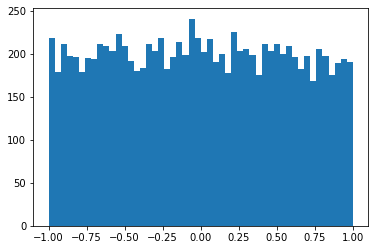

In [305]:
points=[]
for i in range(10000):
    points.append(np.random.uniform(-1, 1))
plt.hist(points, bins = 50)

In [306]:
import math

def simulate(n):
    X = []
    Y = []
    Z = []    
    for i in range(n):
        X.append(np.random.uniform(-1, 1))
        Y.append(np.random.uniform(-1, 1))
        if (math.sqrt(pow(X[i], 2) + pow(Y[i], 2)) <= 1):
            Z.append(1)
        else:
            Z.append(0)
    return X, Y, Z
            

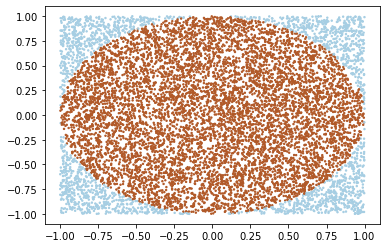

In [307]:
data = simulate(10000)

plt.scatter(data[0], data[1], c = data[2], s = 2.0, cmap=plt.cm.Paired)


In [308]:
def rel_err(n):
    
    data = simulate(n)
    est_pi = 4*sum(data[2])/n
    return (abs(est_pi - math.pi))/math.pi, data

In [309]:
new_err = []
for i in range(1, 1000):
    temp = rel_err(i)
    new_err.append(temp[0])

In [310]:
y=[]
for i in range(1, 1000):
    y.append(1/math.sqrt(i))

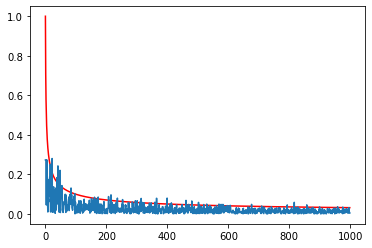

In [311]:
plt.plot(y, 'r')
plt.plot(new_err)